# Проект "Исследование пользователей и поездок сервиса аренды самокатов GoFast"

## Описание проекта <a id='1'> </a>

В данном исследовании буду проанализированны данные о пользователях **сервиса аренды самокатов GoFast** из нескольких городов, а также об их поездках.

**Цель**: проанализировать данные GoFast и проверить гипотезы, направленные на улучшение работы сервиса и определение точек роста.

**Гипотезы**:
- Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
- Расстояние одной поездки в  3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
- Какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план по раздаче промокодов была примерно 5%?

**План работ**:
1) [Описание проектв](#1)
2) [Описание данных](#2)
3) [Загрузка данных](#3)
4) [Предобработка данных](#4)
5) [Исследовательский анализ данных](#5)
6) [Объединение данных](#6)
7) [Подсчёт выручки](#7)
8) [Проверка гипотез](#8)
9) [Распределения](#9)
10) [Вывод](#10)
***

## Описание данных <a id='2'></a>

Данные для исследования включают в себя три таблицы - `о пользователях`, `о поездках` и `о подписках`.

### Пользователи

- `user_id` — уникальный идентификатор пользователя
- `name` — имя пользователя
- `age` — возраст
- `city` — город
- `subscription_type` — тип подписки (*free*: абонентская плата отсутствует, стоимость одной минуты поездки — 8 рублей, стоимость начала поездки — 50 рублей; *Ultra*: абонентская плата — 199 рублей в месяц, стоимость одной минуты поездки — 6 рублей, стоимость старта — бесплатно)

### Поездки

- `user_id` — уникальный идентификатор пользователя
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` — дата совершения поездки

### Подписки

- `subscription_type` — тип подписки
- `minute_price` — стоимость одной минуты поездки по данной подписке
- `start_ride_price` — стоимость начала поездки
- `subscription_fee` — стоимость ежемесячного платежа

<div class="alert"; style="border-left: 7px solid pink">

*Отметим, что таблицы будут впоследствии могут быть объединины по общим столбцам*

</div>

## Загрузка данных <a id='3'></a>

In [1]:
#import library
import matplotlib.pyplot as plt
from scipy import stats as st 
import seaborn as sns
import pandas as pd
from math import *

In [2]:
#data import #1
try:
    users = pd.read_csv('users_go.csv')
except:
    users = pd.read_csv('/datasets/users_go.csv')
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


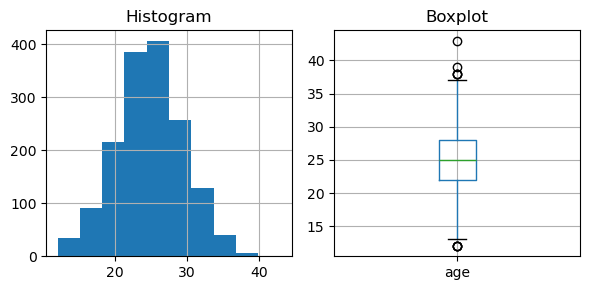

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

users[['age']].hist(ax=axs[0], figsize=(3.5, 3.5))
axs[0].set_title('Histogram')

users[['age']].boxplot(ax=axs[1], figsize=(3.5, 3.5))
axs[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

In [5]:
#data import #2
try:
    rides = pd.read_csv('rides_go.csv')
except:
    rides = pd.read_csv('/datasets/rides_go.csv')
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


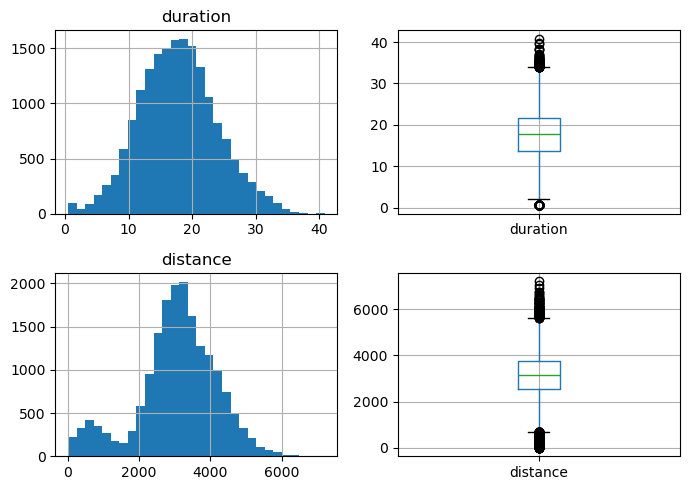

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

rides[['duration']].hist(ax=axs[0, 0], figsize=(3.5, 3.5), bins=30)
rides[['duration']].boxplot(ax=axs[0, 1], figsize=(3.5, 3.5))

rides[['distance']].hist(ax=axs[1, 0], figsize=(3.5, 3.5), bins=30)
rides[['distance']].boxplot(ax=axs[1, 1], figsize=(3.5, 3.5))

plt.tight_layout()

plt.show()

In [8]:
#import data #3
try:
    subscriptions = pd.read_csv('subscriptions_go.csv')
except:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**
- В таблице `users` 1565 строк, пропусков нет. С типами данных всё в порядке. Распределение по столбцу 'age' близко к нормальному
- В таблице `rides` 18068 строк, пропусков нет. Столбец 'date' следуте привести к типу 'datetime'. Распределение по столбцам 'distance' и 'duration' близко к нормальному
- В таблице `subscriptions` 2 строки, пропусков нет. С типами данных всё в порядке
</div>

## Предобработка данных <a id='4'></a>

In [10]:
#convert 'date' columns to the 'datetime' type
rides.date = pd.to_datetime(rides.date, format='%Y-%m-%d')
rides.date.head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

In [11]:
#add a column with the month the trip was made
rides['date_month'] = pd.DatetimeIndex(rides['date']).month
rides.head()

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [12]:
#checking for missing values
print(rides.isna().sum())
print(users.isna().sum())

user_id       0
distance      0
duration      0
date          0
date_month    0
dtype: int64
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


In [13]:
#checking for duplicates

print(rides.duplicated().sum())
print(users.duplicated().sum())

users = users.drop_duplicates()
print(users.duplicated().sum())

0
31
0


In [14]:
#round the values of the 'distance' column

rides['distance'] = round(rides['distance'])
rides.head()

,user_id,distance,duration,date,date_month
0,1,4410.0,25.599769,2021-01-01,1
1,1,2618.0,15.816871,2021-01-18,1
2,1,754.0,6.232113,2021-04-20,4
3,1,2695.0,18.511000,2021-08-11,8
4,1,4029.0,26.265803,2021-08-28,8


<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**
- Данные предобработаны и готовы для анализа
- Данные в столбце 'date' был приведены к типу 'datetime'
- В таблице 'users' был удален 31 дубликат
- В таблицу 'rides' добавлен новый столбец с номером месяца 
- Значения в столбце 'distance' таблицы 'rides' округлены
</div>

## Исследовательский анализ данных <a id='5'></a>

Опишем и визуализируем далее общую информацию о пользователях и поездках:
- `частота встречаемости городов`
- `соотношение пользователей с подпиской и без подписки`
- `возраст пользователей`
- `расстояние, которое пользователь преодолел за одну поездку`
- `продолжительность поездок`

### Частота встречаемости городов

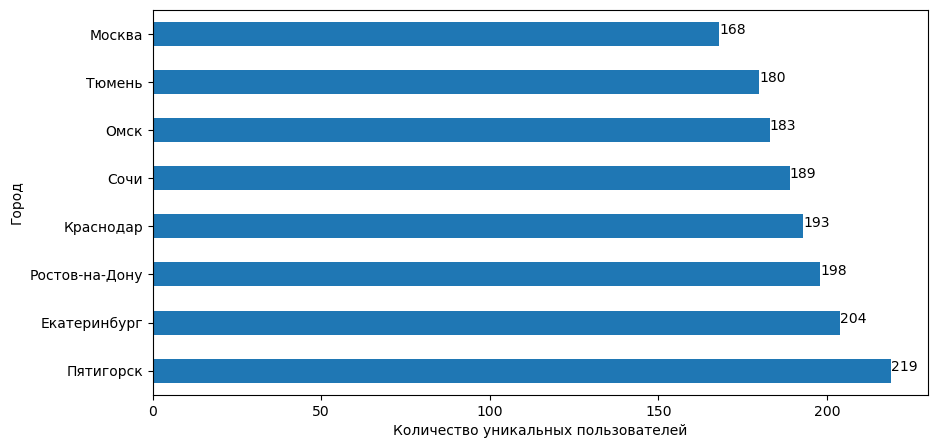

In [15]:
users['city'].value_counts().plot(kind='barh', figsize=(10, 5))
plt.xlabel("Количество уникальных пользователей")
plt.ylabel("Город")

for index, value in enumerate(users['city'].value_counts()):
    plt.text(value, index, str(value))

<div class="alert"; style="border-left: 7px solid pink">

Большинство пользователей из Пятигорска, меньшинство - из Москвы. В целом, пользователи относительно равномерно распределены среди 8 городов.
    
</div>

### Соотношение пользователей с подпиской и без подписки

In [16]:
users.subscription_type.value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

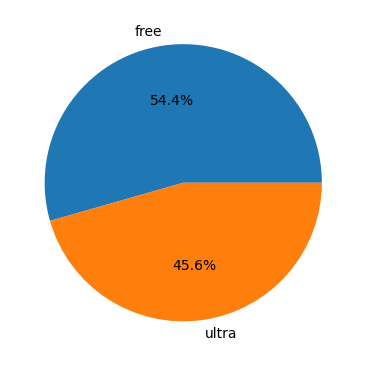

In [17]:
plt.figure(figsize=(4.5, 4.5))
plt.pie(users.subscription_type.value_counts().values, labels=users.subscription_type.value_counts().index, autopct='%1.1f%%')
None

<div class="alert"; style="border-left: 7px solid pink">

`54.4%` пользователей (835) пользуются бесплатной подпиской, `45.6%` пользователей (699) - платной.
    
</div>

### Возраст пользователей

При загрузке данных мы предварительно взглянули на распределение возрастов в данных, рассмотрим данный параметр подробнее:

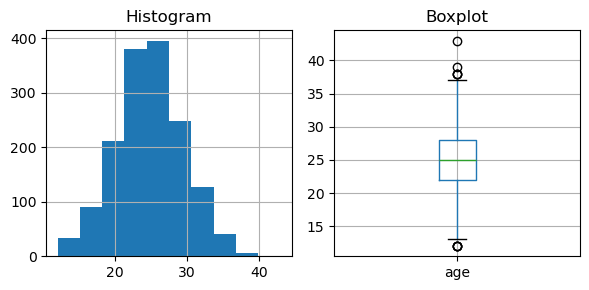

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

users[['age']].hist(ax=axs[0], figsize=(3.5, 3.5))
axs[0].set_title('Histogram')

users[['age']].boxplot(ax=axs[1], figsize=(3.5, 3.5))
axs[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

In [19]:
users.age.describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

<div class="alert"; style="border-left: 7px solid pink">

- Данные имеют `нормальное распределение`
- `Выбросов практически нет`. Медиана практически равна среднему
- 75% значений укладываются до 28 лет. Возраст большинства пользователей в диапазоне `с 20 до 30 лет`
- Самый молодой пользователь - `12 лет`, самый возрастной пользователь - `43 года`.
    
</div>

### Расстояние, которое пользователь преодолел за одну поездку

Рассмотрим расстояние, которое пользователь преодолел за одну поездку, оно представлено в столбце distance (в метрах) в таблице `rides`.

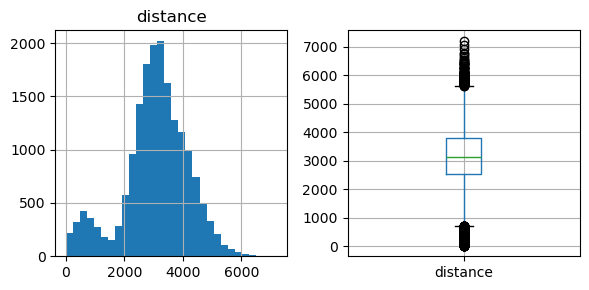

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

rides[['distance']].hist(ax=axs[0], figsize=(3.5, 3.5), bins=30)
rides[['distance']].boxplot(ax=axs[1], figsize=(3.5, 3.5))

plt.tight_layout()

plt.show()

In [21]:
rides.sort_values(by='distance').head()

,user_id,distance,duration,date,date_month
11555,1069,1.0,10.001902,2021-01-31,1
9541,925,3.0,3.011018,2021-10-19,10
13690,1223,4.0,4.008958,2021-05-22,5
7841,796,7.0,10.026614,2021-11-26,11
8658,861,7.0,6.015656,2021-07-21,7


In [22]:
rides.sort_values(by='distance', ascending=False).head()

,user_id,distance,duration,date,date_month
16309,1411,7211.0,0.500000,2021-04-15,4
16484,1422,7066.0,23.619318,2021-02-12,2
15580,1361,6908.0,23.816983,2021-03-27,3
17171,1471,6761.0,32.043760,2021-08-03,8
17242,1477,6725.0,0.500000,2021-01-12,1


In [23]:
rides.distance.describe()

count    18068.000000
mean      3070.659010
std       1116.832209
min          1.000000
25%       2543.000000
50%       3134.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

<div class="alert"; style="border-left: 7px solid pink">

- Гистограмма имеет `бимодальный` вид. Основный пик - поездки длинной примерно `3000м`, второй пик - короткие поездки длиной `до 1000м`
- Присутствуют очень короткие поездки - `до 10м`, и достаточно длинные поездки - `более 6000м`
- Наиболее популярные поездки составляют около `3000м`. `75%` поездок - `до 3776м`
    
</div>

### Продолжительность поездок

Взглянем теперь продолжительность сессии (в минутах), она указана в столбце `duration`:

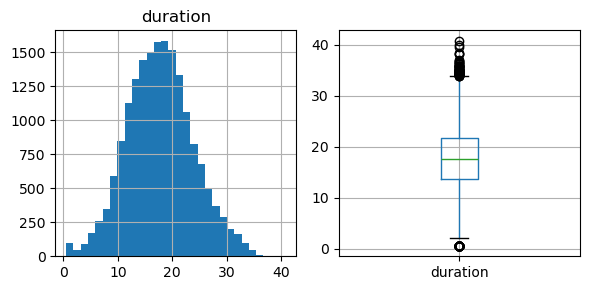

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

rides[['duration']].hist(ax=axs[0], figsize=(3.5, 3.5), bins=30)
rides[['duration']].boxplot(ax=axs[1], figsize=(3.5, 3.5))

plt.tight_layout()

plt.show()

In [25]:
rides.duration.describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

<div class="alert"; style="border-left: 7px solid pink">

- Гистограмма имеет `нормальное распределение` с `медианным` и `среднем` значением в диапазоне `17-18 минут`
- `Имеются выбросы`: один среди слишком коротких поездок и несколько среди слишком длинных поездок
    
</div>

<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**
    
В исследовательском анализе пользовательских данных выявлено следующее: большинство пользователей из Пятигорска, с небольшой долей из Москвы, равномерное распределение среди 8 городов. Половина пользователей использует бесплатную подписку, другая половина — платную. Возраст распределен нормально, практически без выбросов. Большинство пользователей в возрасте 20-30 лет, с наиболее популярной длиной поездки около 3000 метров. Продолжительность поездок также имеет нормальное распределение, с медианным значением около 17-18 минут.
 
</div>

## Объединение данных <a id='6'></a>

### Объединение таблиц и создание новых датафреймов

Объединим данные о пользователях, поездках и подписках в один датафрейм:

In [26]:
# посмотрим на исходную размерность. необходимо, чтобы после объединения размерность таблицы, к которой
# присоединяем должна совпадать с исходной
print('Исходная размерность таблицы "users":', users.shape)
print('Исходная размерность таблицы "rides":', rides.shape)
print('Исходная размерность таблицы "subscriptions":', subscriptions.shape)


data = users.merge(rides, on='user_id')
data = data.merge(subscriptions, on='subscription_type')

print()
print('Исходная размерность объединенной таблицы:', data.shape) # количество совпадает (18068)
print()
print('Количество пропусков в объединненой таблице:', data.isna().sum(), sep='\n') # пропусков нет

Исходная размерность таблицы "users": (1534, 5)
Исходная размерность таблицы "rides": (18068, 5)
Исходная размерность таблицы "subscriptions": (2, 4)

Исходная размерность объединенной таблицы: (18068, 12)

Количество пропусков в объединненой таблице:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
date_month           0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [27]:
data_ultra_users = data[data['subscription_type'] == 'ultra']
data_ultra_users.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.0,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,26.265803,2021-08-28,8,6,0,199


Создадим отдельный датафрейм с пользователями без подпиской:

In [28]:
data_free_users = data[data['subscription_type'] == 'free']
data_free_users.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2516.0,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,847.0,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.0,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1206.0,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.0,17.427673,2021-02-14,2,8,50,0


### Анализ расстояния и времени поездок для пользователей с подпиской 'ultra' и 'free'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


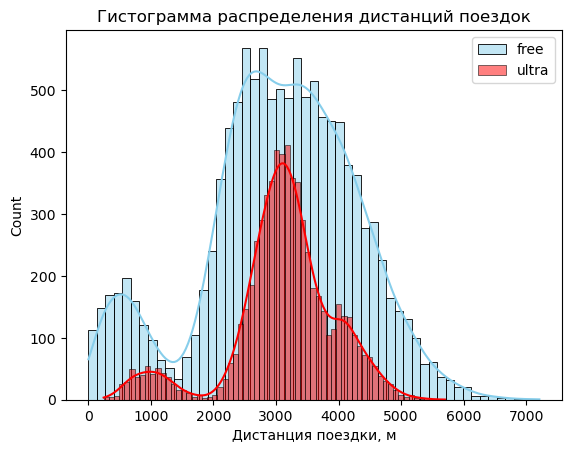

In [29]:
sns.histplot(data=data_free_users, x=data_free_users['distance'], color="skyblue", label="free", kde=True)
sns.histplot(data=data_ultra_users, x=data_ultra_users['distance'], color="red", label="ultra", kde=True)
plt.title('Гистограмма распределения дистанций поездок')
plt.xlabel('Дистанция поездки, м')
plt.legend() 
plt.show()

<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**
- Пользователи с `платной` подписках чаще ездят на более `дальние` дистанции, чем пользователи с `бесплатной` подпиской
- Среди пользователей с `бесплатной` подпиской больше `коротких` и `недолговременных` поездок 
</div>

## Подсчёт выручки <a id='7'></a>

Создим датафрейм с помесячными данными о сумме дистанции, сумме времени и количестве поездкок пользователей:

In [30]:
#округлим продолжительность каждой поездк
data['duration'] = data['duration'].apply(ceil)

#создадим агрегированную таблицу с использованием сводных таблиц
data_groupby_sub = data.groupby(['user_id', 'date_month'])['subscription_type'].unique()
data_groupby_sub
data_groupby = data.groupby(['user_id', 'date_month'])[['distance', 'duration']].agg(['sum', 'count'])
data_groupby = data_groupby.droplevel(1,axis=1)
data_groupby = data_groupby.join(data_groupby_sub)
data_groupby.columns = ['distance_sum', 'distance_count', 'duration_sum', 'rides_number', 'subscription_type']
data_groupby = data_groupby.drop(columns = ['distance_count'],axis = 1)
data_groupby.reset_index(inplace=True)
data_groupby.head()

,user_id,date_month,distance_sum,duration_sum,rides_number,subscription_type
0,1,1,7028.0,42,2,[ultra]
1,1,4,754.0,7,1,[ultra]
2,1,8,6724.0,46,2,[ultra]
3,1,10,5810.0,32,2,[ultra]
4,1,11,7004.0,56,3,[ultra]


Напишем функцию, которая опеределяет подписку по user_id, после чего добавим соответствующий столбец:

In [31]:
def subscription_calculator(user_id):
    return data[data['user_id'] == user_id]['subscription_type'].unique()[0]
data_groupby['subscription_type'] = data_groupby['user_id'].apply(subscription_calculator)
data_groupby.head()

,user_id,date_month,distance_sum,duration_sum,rides_number,subscription_type
0,1,1,7028.0,42,2,ultra
1,1,4,754.0,7,1,ultra
2,1,8,6724.0,46,2,ultra
3,1,10,5810.0,32,2,ultra
4,1,11,7004.0,56,3,ultra


Посмотрим на цены в зависимости от тарифа:

In [32]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Посчитаем функцию для подсчета выручка с поездки:

In [33]:
def month_revenue_calculator(row):
    if row['subscription_type'] == 'ultra':
        return 199 + row['duration_sum'] * 6
    else:
        return row['rides_number'] * 50 + row['duration_sum'] * 8
    
#добавим соответствующий столбец в датафрейм
data_groupby['month_revenue'] = data_groupby.apply(month_revenue_calculator, axis=1)
data_groupby.head()

,user_id,date_month,distance_sum,duration_sum,rides_number,subscription_type,month_revenue
0,1,1,7028.0,42,2,ultra,451
1,1,4,754.0,7,1,ultra,241
2,1,8,6724.0,46,2,ultra,475
3,1,10,5810.0,32,2,ultra,391
4,1,11,7004.0,56,3,ultra,535


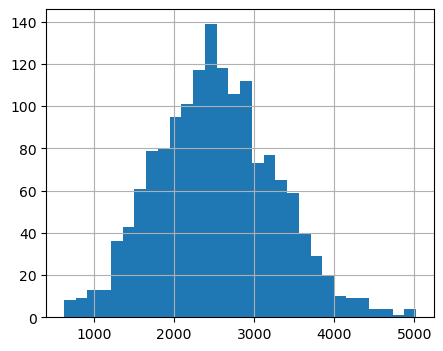

In [34]:
data_groupby.groupby('user_id')['month_revenue'].sum().sort_values(ascending=False).hist(figsize=(5,4), bins=30)
None

In [35]:
data_groupby.groupby('user_id')['month_revenue'].sum().sort_values(ascending=False).describe()

count    1534.000000
mean     2528.449153
std       740.607283
min       626.000000
25%      2012.500000
50%      2497.000000
75%      3003.000000
max      5022.000000
Name: month_revenue, dtype: float64

<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**
- Распределение выручки от одного пользователя близко к `нормальному`
- Как правило, один пользователь приносил `около 2500р` выручки. При этом были те, что приносили компании `менее 1000р` и `более 5000р` выручки
</div>

## Проверка гипотез <a id='8'></a>

### Гипотеза №1. Пользователи с подпиской тратят больше времени на поездки

**Нулевая гипотеза (Ho)**: среднее генеральной совокупности 'data_ultra_users['duration']' равно среднему генеральной совокупности'data_free_users['duration']'

**Альтернативная гипотеза (H1)**: среднее генеральной совокупности 'data_ultra_users['duration']' больше среднего генеральной совокупности'data_free_users['duration']'

In [36]:
# Для проверки данной гипотезы сформулируем и проверим одностороннюю статистическую гипотезу о равенстве средних
# двух генеральных совокупностей - 'data_ultra_users['duration']' и 'data_free_users['duration']'

alpha = .05 # установим уровень статистической значимости. если p-value окажется меньше него, то отвергнем Ho

results = st.ttest_ind(data_ultra_users['duration'], data_free_users['duration'], alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу в пользу альтернативной


<div class="alert"; style="border-left: 7px solid pink">

Нулевая гипотеза была `отвергнута`, следовательно можно предполагать, что пользователи с подпиской тратят `больше` времени на поездки, а значит могут быть `«выгоднее»` для GoFast
</div>

### Гипотеза №2. Расстояние одной поездки пользователей с подпиской не превышает 3130м

**Нулевая гипотеза (Ho)**: среднее генеральной совокупности data_ultra_users['distance'] равно 3130

**Альтернативная гипотеза (H1)**: среднее генеральной совокупности data_ultra_users['distance'] больше 3130

In [37]:
# Для проверки данной гипотезы сформулируем и проверим одностороннюю статистическую гипотезу о равенстве среднего
# генеральной совокупности data_ultra_users['distance'] значению 3130

opt_value = 3130 # оптимальное с точки зрения износа самоката расстояние одной поездки

alpha = .05 # установим уровень статистической значимости

results = st.ttest_1samp(data_ultra_users['distance'], opt_value, alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.9195649894697724
Не отвергаем нулевую гипотезу


<div class="alert"; style="border-left: 7px solid pink">

`Не получилось опровергнуть` нулевую гипотезу, следовательно можно предполагать, что расстояние одной поездки пользователей с подпиской `не превышает` 3130м
</div>

### Гипотеза №3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

**Нулевая гипотеза (Ho)**: среднее генеральной совокупности 'data_groupby[data_groupby['subscription_type'] == 'ultra']['month_revenue']' равно среднему генеральной совокупности data_groupby[data_groupby['subscription_type'] == 'free']['month_revenue']

**Альтернативная гипотеза (H1)**: среднее генеральной совокупности 'data_groupby[data_groupby['subscription_type'] == 'ultra']['month_revenue']' больше среднего генеральной совокупности data_groupby[data_groupby['subscription_type'] == 'free']['month_revenue']

In [38]:
# Для проверки данной гипотезы сформулируем и проверим статистическую гипотезу о равенстве средних
# двух генеральных совокупностей - 'data_groupby[data_groupby['subscription_type'] == 'ultra']['month_revenue']'
# и data_groupby[data_groupby['subscription_type'] == 'free']['month_revenue']

alpha = .05 # установим уровень статистической значимости. если p-value окажется меньше него, то отвергнем Ho

results = st.ttest_ind(
    data_groupby[data_groupby['subscription_type'] == 'ultra']['month_revenue'],
    data_groupby[data_groupby['subscription_type'] == 'free']['month_revenue'],
    alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу в пользу альтернативной


<div class="alert"; style="border-left: 7px solid pink">

Нулевая гипотеза была `отвергнута` в пользу альтернативной, следовательно можно предполагать, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
</div>

## Распределения <a id='9'></a>

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей.

Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

0.9520774340068084


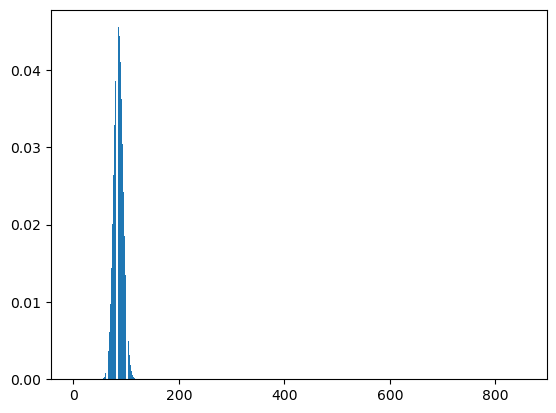

In [39]:
p = 0.1 # вероятность продлить подписку
n = 854 # количество разосланных промокодов

mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma)

x = 100 # значение, для которого хотим найти вероятность


result = distr.cdf(x) # считаем вероятность получить значение, равное x или меньше 

print(result)

distr_plot = []
for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr_plot.append(prob)
    
plt.bar(range(0, n + 1), distr_plot)
None

<div class="alert"; style="border-left: 7px solid pink">

**Ответ:**
    
Нужно отправить `854 промокода`, что вероятность не выполнить план была 5%
</div>

*7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.*

In [40]:
# задаём параметры биномиального распределения
n = 1_000_000
p = 0.4

# зададим параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение с математическим ожиданием 18 
# и стандартным отклонением ~3.29
distr = st.norm(mu, sigma) 

# границы интервала
y = 399500

# считаем вероятность получить значение до y
result = distr.cdf(y)

print(result)

0.15371708296369768


<div class="alert"; style="border-left: 7px solid pink">

**Ответ:**
    
Вероятность того, что уведомление откроют `не более 399,5 тыс.` пользователей равна `15%`
</div>

## Вывод <a id='10'></a>

В данном исследовании были проанализированны данные о пользователях сервиса аренды самокатов *GoFast* из нескольких городов и их поездах *с целью* определить точки роста сервиса. В результате можно сформулированать следующее заключение:

- Пользователи с подпиской тратят больше времени на поездки, а значит могут быть «выгоднее» для GoFast. Это подтверждается тем, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. В этом ключе стоит `обеспечить рост данной категории пользователей`. Зона роста есть, так как сейчас только `45.6%` пользователей (699) пользуются платной подпиской
- Расстояние одной поездки пользователей с подпиской, как правило, не превышает `3130м`, следовательно самокаты изнашиваются с `оптимальной` интенсивностью
***


*Среди прочего анализа было также определено:*
- *Большинство пользователей в возрасте `20-30 лет`*
- *Продолжительность поездок в среднем составляет `17-18 минут`*